In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


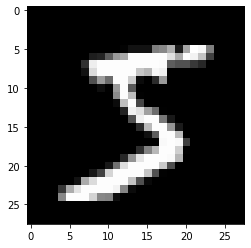

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap="gray")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 分類問題: 交叉商
# 商: p * log(1 / p) -> Gini: p * (1 - p)
# 交叉商: 
# categorical(多元)[softmax]: p1 * log(1/q1) + p2 * log(1/q2).....
# binary(一個神經元)[sigmoid:0-1]: p * log(1/q) + (1-p) * log(1/1-q)
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# validation_split: 留下一些訓練資料來看模型好不好
# batch_size: 看多少筆做一次平均梯度
# epochs: 整份資料看幾遍
# verboes: log的詳細程度[1:進度條 0:空無一度 2:必要的就好]
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
     ModelCheckpoint("mlp.h5", save_best_only=True),
     EarlyStopping(patience=3, restore_best_weights=True)
]
model.fit(x_train_norm,
          y_train_cat,
          validation_split=0.1,
          batch_size=200,
          epochs=50,
          verbose=2,
          callbacks=c)

Epoch 1/50
270/270 - 1s - loss: 0.4283 - accuracy: 0.8836 - val_loss: 0.1971 - val_accuracy: 0.9478
Epoch 2/50
270/270 - 1s - loss: 0.1994 - accuracy: 0.9435 - val_loss: 0.1441 - val_accuracy: 0.9637
Epoch 3/50
270/270 - 1s - loss: 0.1496 - accuracy: 0.9575 - val_loss: 0.1166 - val_accuracy: 0.9682
Epoch 4/50
270/270 - 1s - loss: 0.1197 - accuracy: 0.9658 - val_loss: 0.1018 - val_accuracy: 0.9708
Epoch 5/50
270/270 - 1s - loss: 0.0980 - accuracy: 0.9723 - val_loss: 0.0939 - val_accuracy: 0.9722
Epoch 6/50
270/270 - 1s - loss: 0.0834 - accuracy: 0.9765 - val_loss: 0.0883 - val_accuracy: 0.9752
Epoch 7/50
270/270 - 1s - loss: 0.0713 - accuracy: 0.9791 - val_loss: 0.0857 - val_accuracy: 0.9742
Epoch 8/50
270/270 - 1s - loss: 0.0614 - accuracy: 0.9826 - val_loss: 0.0850 - val_accuracy: 0.9742
Epoch 9/50
270/270 - 1s - loss: 0.0536 - accuracy: 0.9850 - val_loss: 0.0791 - val_accuracy: 0.9765
Epoch 10/50
270/270 - 1s - loss: 0.0457 - accuracy: 0.9872 - val_loss: 0.0770 - val_accuracy: 0.9765

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9781


[0.07231985777616501, 0.9781000018119812]

In [ ]:
from sklearn.metrics import confusion_matrix
# predict:原本predict_proba
# predict_classes: 原本predict
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             columns=["{}(預測值)".format(i) for i in range(10)],
             index=["{}(正確值)".format(i) for i in range(10)])

,0(預測值),1(預測值),2(預測值),3(預測值),4(預測值),5(預測值),6(預測值),7(預測值),8(預測值),9(預測值)
0(正確值),967,0,1,1,1,0,5,1,2,2
1(正確值),0,1124,3,1,0,1,2,0,4,0
2(正確值),4,1,1011,0,1,0,2,7,5,1
3(正確值),0,0,4,984,2,7,0,7,2,4
4(正確值),1,0,1,0,962,0,4,2,2,10
5(正確值),3,1,0,4,1,867,8,2,3,3
6(正確值),3,2,2,1,3,4,943,0,0,0
7(正確值),0,3,11,3,1,0,0,1002,1,7
8(正確值),4,1,4,5,2,4,4,3,943,4
9(正確值),3,3,0,7,7,2,1,6,2,978


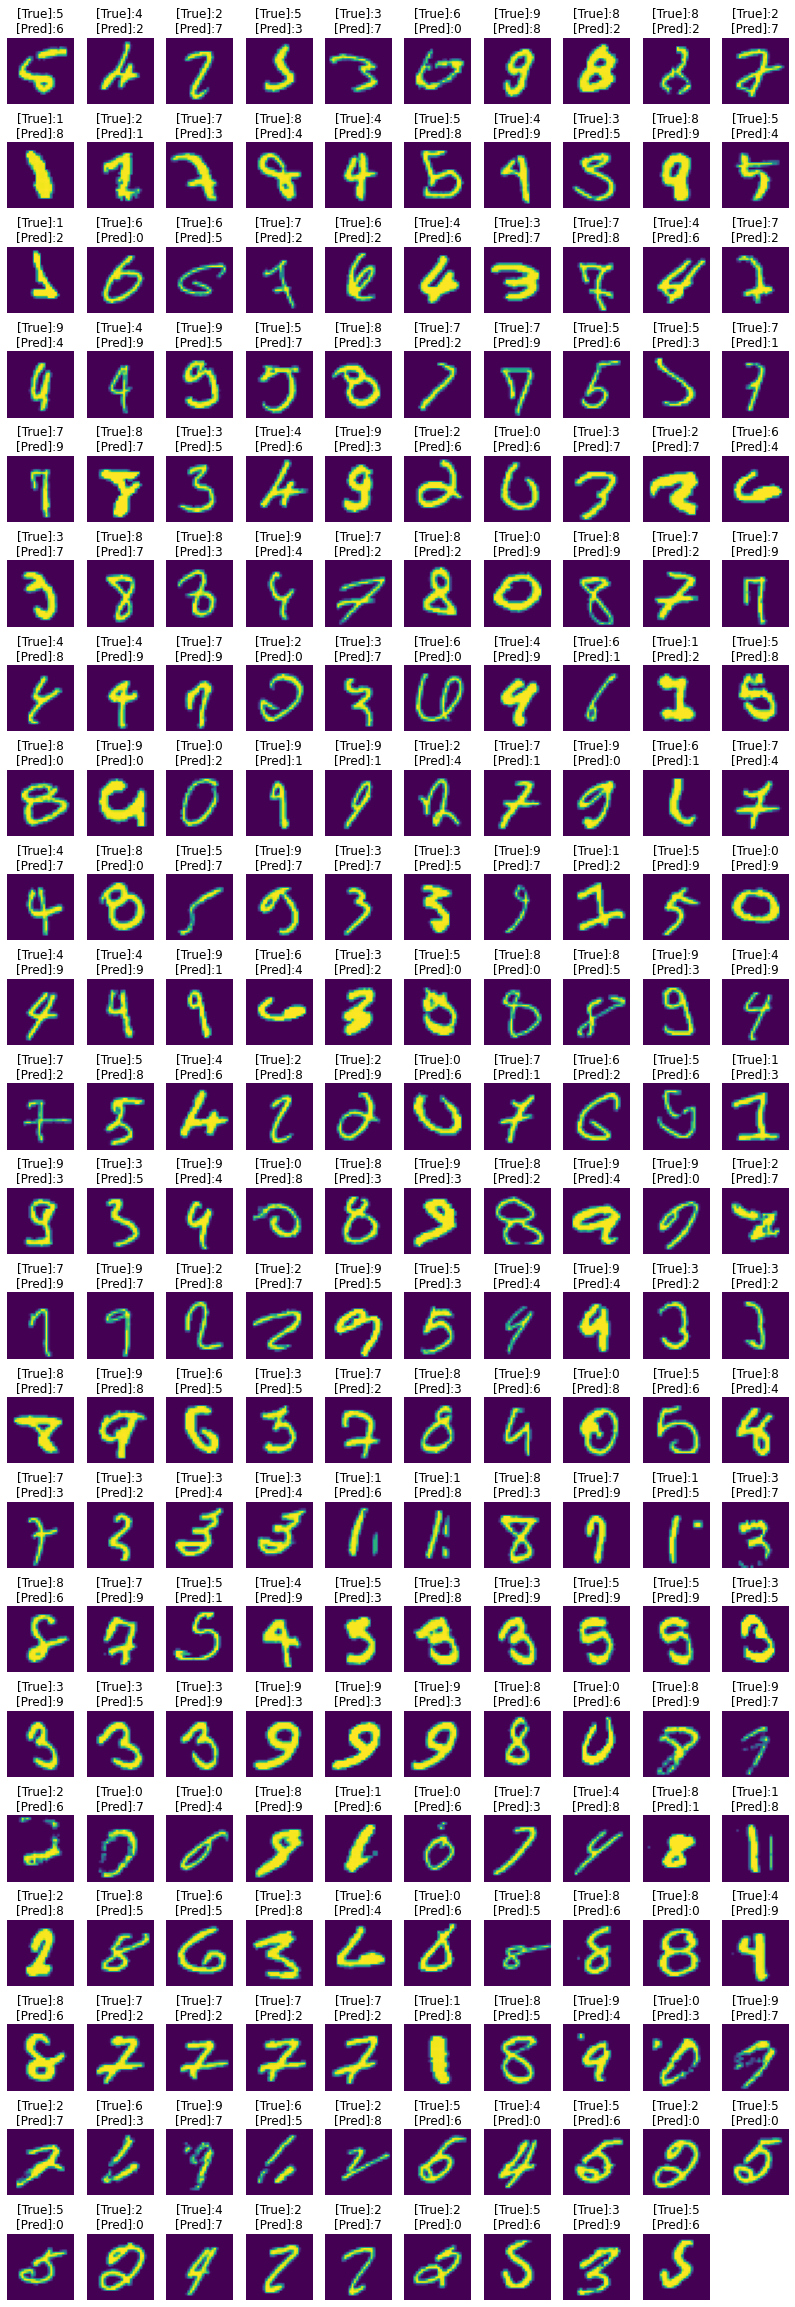

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_label = y_test[idx]
false_pred = pre[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[True]:{}\n[Pred]:{}".format(false_label[i],
                                      false_pred[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

In [ ]:
# 儲存: model.save("xxx.h5")
# 載入: compile(X) fit/predict(O)
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img

model_load = load_model("mlp.h5")
fp = input("檔名:")
img = load_img(fp, target_size=(28, 28))
np.array(img).shape

檔名:test.png


(28, 28, 3)